# Hashtag grouped bar charts - Fake Covid-19 dataset

We've used the following packages:

In [1]:
import pandas as pd
import numpy as np
import json
import sys
import string
import re
import itertools  
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import nltk
from PIL import Image
import altair as alt
import csv
import itertools

In order to do the classification of the tweets, we need to read the csv file and the json file:

In [2]:
csv_dataframe = pd.read_csv('dataset/FINAL_fakecovid_final_filtered_dataset_clean.csv',sep=";")
csv_dataframe['tweet_id'] = csv_dataframe['tweet_id'].astype(str)
csv_list = csv_dataframe.values.tolist()
lista_unica_csv=list(itertools.chain.from_iterable(csv_list))

data = []
with open('dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))


In this notebook we are going to visualize most frequent hashtags and we will classify them according to type of tweet that they're in.

In [3]:
index=0
cmt_list = []
#stopwords = set(STOPWORDS) 
for element in data:
    token_id = data[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    for entity in data[index]['entities']['hashtags']:
        entity['text'] = entity['text'].lower().replace(" ", "")
        token=entity['text']
        final_token = token + " " +lista_unica_csv[indice_csv+1].lower().replace(" ", "")
        cmt_list.append(final_token)
    index=index+1

We create the pandas DataFrame and then we work on it in order to create a better bar chart:

In [4]:
fdist = dict(nltk.FreqDist(cmt_list))


df = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
df = df.rename(columns={'index':'hashtags', 0:'count'})
col_one_list = df['hashtags'].tolist()
col_two_list = df['count'].tolist()
typelist=[]
namelist=[]

index = 0

count_false = [0] * len(col_one_list)
count_part = [0] * len(col_one_list)

for el in col_one_list:
    tok = el.split()
    namelist.append(tok[0])
    if tok[0] in namelist:
        indx = namelist.index(tok[0])
        if tok[1] == "false":
            count_false[indx] = col_two_list[index]
        elif tok[1] == "partiallyfalse":
            count_part[indx] = col_two_list[index]
        else:
            print("errore count")
    index = index + 1

del df['hashtags'] #clean column
df['Hashtags']=namelist
df['False']=count_false
df['Partially False']=count_part
del df['count'] #clean column
df['count'] = df['False'] + df['Partially False']


df = df.sort_values(by=['count'],ascending=[False])
#print(df.head(20))

We visualize most frequent hashtags and we will classify them according to the type of tweet that they're in, we have filtered in the range of a minum of 10 tweets to a maxium to 212 tweets total (which is the maxium number of tweets created by a user in the dataset). <br>
Every bar is colored basing on the amount of tweet written per each category (False, Partually False). 
<br><br>
We have used Vega to plot this chart and not Altair, to get the data in a good looking way (already indented) and ready for the Vega Editor we have used Altair to get them. (Plot the chart => view source => clean the source and copy paste on Vega).
**We know this isn't the most efficient solution, let us know if you have other ideas**.

In [5]:
range_ = ["#0C7BDC","#FFC20A"]


bars = alt.Chart(df).transform_fold(
    ['False', 'Partially False']
).mark_bar().encode(
    x=alt.X('key:N',title=None),
    y=alt.Y('value:Q',title="Tweet count"),
    color=alt.Color('key:N', scale=alt.Scale(range=range_),title="Category"),
    column="Hashtags:N",
    tooltip=[
        alt.Tooltip('key:N', title='Tweet Type'),
        alt.Tooltip('Hashtags:N', title='Hashtag'),
        alt.Tooltip('value:Q', title='Tweet count')
    ]
).transform_filter(
    alt.FieldRangePredicate(field='count', range=[12, 212])
).properties(
    title="The most frequent hashtags classified by category (False, Partually False)", 
    width=95
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    titleFontSize=15,
    labelFontSize=13,
    titlePadding=10
).configure_header(
    titleFontSize=16,
    labelFontSize=14
)

alt.Chart(...)

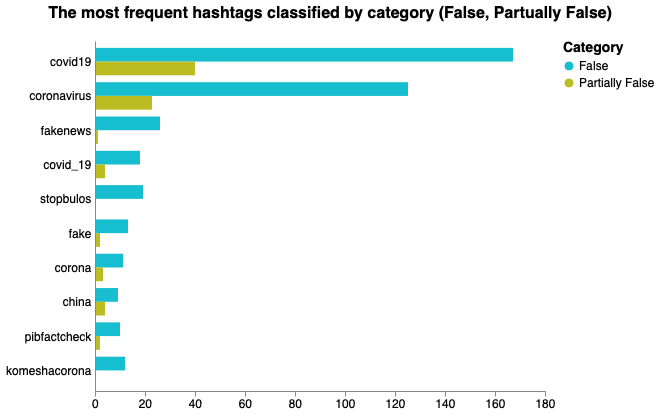

### [Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAATONABONHJnaT0AFXgACBGwiYdAM0VwAjgzjijMJBCxIyEHVAA29iDWM04snUwAnq5ImORsisEAFABiSG4QcFI6AApIipgM8W7BcQlwAJTSIADuNLL0aAAsAgAMMvA0ZFhoAMx1MjhIsrI04mRoAjJqmG5waKBhAB6YaCDacHoGRqYWVjY6dg6YTi7unt6+-kEhYWQR0XmJyWkZWW45OleFxcYSmADKNABe46gAjAA2GRsYzGRKzVAAJlqAF8ZLJQihUABtUDiJAIP4gHZMMbFYjxKwQNBokAACXsjmccygbGI5X+AE5is80ECAOwyW5qbK5eKJar1EB0hg2NAwjnw0CU7a7WkRCRIBmKBgkmRsgFQoYgHk0PlPAV-KGtGSi8UAqoADmlFKpOxp6GMSAA1tY4CV1SBNVDgbr0ryHvz8uyzWwxZCoVKpDL7fL0HSGbIAPrM1lG9lW7kB-VBw0h1BVMMRiVQ22y6kk9CGNg4JgMNwGdMF5nZjK5x6a4XmyHM8txx0gZ1u5uCgGm-3tg0+4sW-4Cftywd0xRK0d-f7-NuBzsZ1ATnvsqqLyu0mB9FAavdM7cd4Njosi8Nz1onh1VkA4GhMZ1QTCwOAoBddd2WFPVpz3KFZ17MsYztJcPxdNgsQcJAVzXK8Wygycd3vP5u2fGC33jEBDCQQJQhgZDxkwsdN1vCCCwIksAX+YjBwUHYVTVRscAMaiQIBMCc0YsdmLnOE4Ird85hKBg7EkWi-i5HC73zMcD0I0D2I-RNyhhNMlLQLNVNEjdoLQJkdIVJNBJvUy8y7CzUCsqSB10+lygAWkM71rwYxy93EyFXNjBC5j6XokB8ZpMGgRUMUElTwMCltnJtNzwurHZAiorFBJMlLdyY9LrITBLlRoVUxAYTAmDMV0koC4q6NKzLT3QQJqLWPw2GsKB7EvPyCwnIq8MGNqwo6odXXdT14jgDJBJ1Mb1PMp8WMBMqn1XDFwzqhrgKM1AVpE1LWo2i0tvamT0AMplxETZbmvGgFnOuqbbtIthMmehyWvw5yFxukjGyA2Q2BKRThofF61tDS7IWBz6SPrVVxF6P7VqcxHBm25BEQoaB0ixs6AbQYK8ZBwd6zGaHNVOqdzsB3GTu2vTZGZSL9UEx9sb3LdWeR+DpqQHAcA8NV+Lccp0nYQThKZ8nC2c49qY-Sw-Dgfr7BomH1v5kbVe26LlAG3m4Zxw9C22ko7DisWcAt-7Xspm31ZsxkmTgeh2C-IbNVGsnXsF621ZRwcaxwDnBOww2x2wsOTbGJbjr54P4dQN3w5Fr7xFrGgoGd+OWaTj30AQGgZZ2SJi4zq2tPdiOP3oBrZDrpXXeN8vSK6PpBKDzvM9Dxuc+kkjLHSJAbD6PXNXToeG5Ysf3LmMQoFzXoyMevoBmOwfcMzt3Xx7x3JfXtgxj-GhSAVy2900liT+b2T5OnnBxDgBh9HEHn9-vkqrNn651RlXH2Pt-i1CgTgBQTZ-4uyPs5YB48aaHV3p-T0A8AFiSQdtR69J7qx2weta2yDV4JmYAHSCxCEakO2mRQIEBopzwfjQrOuCe4unziUegcBfxxSwQgpeFoyFZR2kqbiEAGA4ERGEIhQiBYcJfugHYbozAQD4uILwTAq50ECIIkuFMlEgNQXAV0u95GGLekA5OZBFp-31m0Nhx92aeU5kyfa9UzFHUcdCNhI8n7bToPEfRx04710UTYnuA1FDKmnk4NgOjFr516JXLwEgDERMAXQnuMs4BMEWnfBRRsonKM-OeBwFj4FWJcT3AAz2QDwTQYAYhgAAS6qmY8Q9NWHFJwaUkxulVxQ0EoLKxidG6iOmlkFhgCrGPxEezdIfBa7VKyf0nJZSxhMGnhktZi8grGJQR5XalVqpdAxogQulj1ml0brBMpLoGAlCQHQUZ-jnIPMGQqU5kimE3IOdk+521MBsDsbwxQJRvHWC9JqMZtzaHAuiW4phxhZkJ2cZ8vBbB0IYlpgYSgALD7CMjNtAQe9fHhMBRspFZTcVIGkbIhQ3MqFpT6SQ2l3z0BIG+HQGAq4ECBA3j0uZCK-Gsy+ccn5Eiqpqj6CyolakSUSnZmbN0swwmYolezc8n9BSavZUY7VPcmG-xrqE3x8LqUcpYpK8hIBwxmC0ei40WrrZ2rEWfBl+rLUfONWU5AihFCKrMka9120zB8VTr6w11jw092QBAHxM5Y1uw9dNQCkN7AhuZmGzlUr0AwECLIVcUwhUwEbKuSws8c3KzTfQuw8BrA7OaDgVcYRDC1q7v6rlIAsSyDFDQMo1gu2IJ7QW0imAnVkF4TYeAGI1B7MpW6-N9rEiKAZFAF1EoV22tcUmZkCgLmsoxamrFyKD1MjdOICio7lXQm2jgZgMsALxEqAamp566UotBXgMo9B8ofrFfW5FvzZUQAagBCA8g3DnjvYc8d9rhDTx2FABgig0UlHg0CvdoGZXVQJsoduQHrV5tw9+sD1Uj3xOwzS8jvb6WSKPbRu59GJ1wFIDYAyRTxlfoY-SXyKbP2IbES8jRYs3GCeoWekT00pEY3IvQcMsVYXSeE-GspPVZDEB42KiZbH7V9GMG4dY3wT2upkxp3tXQXQ0G3ixsjFp01fXpRu8DDn2Gybzlmi1QngN8YnVwyGXV0P8NUwWKlxKENWYnRzMweSfCKHC6e9Tq7RNUhC4oBSshksWdSwZsRMDFAAC-DAAEPxDEinYNfOuWd2WbS9NFlGJFCCo8yBspGCvDQBoL1wlJGos4aczqytbBq2f3ebGgJw2e52zYO1gL9qXTLZhDCBbXmSIvNiRQPohhJHrZi-a+g08XR1c87xjbkccqoq-hSvzpHPOHbERyLrB3GtfXSHYmw1gGW-0RP15dDWCvTUY+BhVA2lXRfeyRZ0iQZYFMUAjnYxHAf5Zm2UqqZ3IuQ6G6S0+xgnYQ9DY96Hg5weo-85dj8OzZB2KS7ph7+n0f8cvf8onuaSfA5cxVRloRmW-wxg4+7g26PM4nfAN9MASgRDUVj3dYv7Uc0AD8MUmIvy7x486wt72d1sW2IphSXExQkm1Y6bGve0FLcLQb+b2uckXpa8jE3wGC6JdOZ+raPzcTvkNPZMgByMEACJggBSMEAKJgfvACMYH7wAVGAm7FWblVPcJduHfb4xWIuLNPemvVNUcO5dA4V2I+LvhjD5ynXAWsI6dfdsz19fhAEgKx4e-Hh9PdehmD-Lbgv0zFBfY1TG03evppIUvY39PiK7eDkRNLtgvR6pIHPAgTvXv7UI9CA2JAaFJMsmOlasfcbScnKVMmCAv8G-HTTzj09NeSLCBoLZ-oHokBQrKJ-AHwvL+sa719BA0BVu1CXwnppjMH0NfBIGYJbjLEunCuruyBGvPg2AOggHgMgHYLEtsLEgznvs3mxD3MIN-CgQgJQrEsmghgPqzDgRjsoD6jjGQdbBQb2uwOoqCgNGzv3pTnQaqhyKPh-o5r2BGkeoBH3tAfnnwSai7hvPIEwMhAjmdhfsTtgdtMZhELLNwcTm7PQROq8j-qoRzuoYoSZjobruQdtHiJFHqhAMmJYYYdXo3BoSvmwGwL8DAj0CnLIX6hwa3pEDoqgZgTwfvixHYWIliPTjvjAQCNtDLJYBEG2mwOeDoouiKv0rQbYXgkwFIjInzm4VNs5IEXJpkEwL4fITkfQukGdrvn4XoT3Lwh4B2kIZEp7rAbNtrG7hvGoL8OIG-vUewSkRel7MxqESIY0VsjitYWOh4RRvhmqLANkNYHYp0Wyg0eEafEmgoIgG2uXr-KMferkV9CUFQW6DBmMDQJXDsAkWUWETsfbqqN8KuMhvMRdIsZcZHNRGhjsvcQbN0QESbAAI8SBWDECXxijpDvEIyPHbS35bFQ5fHRIKQUAYwQGQm45DG9oMKUTURMKkAyykBZHJHQnfpJjsACLn7uE9FlLZZ9DZb-qMBwmIiFEc4KFVH9AzqImi6iGPJUiVzBoDFgk9zVReDu7WI8l0rxKRB2YeAYznGDFLFlKJBobKCYCBBvCKBbqSlCm9oMA0kClyH0nFFiHiwRB1ELGfFzjbSzGzyFLcnGlskomvKVosmf7WkTpiBuC9AWlsEPaVFlL1h4EIBowCnlFqG6llKhDmyWkelBm9q9CulBpID7T2m8HImxaYiLQOGJEfHhnGE9wcbBJwBuCg7VTxmc4mk9zDhwDJivZhl76eks76S1BcyC7+kXHbRISnJP7ubEnZGZllJ-EIBTAcyq4PFWmJn2pkAMC9BdCyAvKFnVkTq8J8QvrbrnZx4RkTrIAeDKBakkl4kMENkxRYDxSUZqjTkrmK4VSSK7aNlSlPG6SoF6LJjHldm9r2DHFdIPnjE2m6L9A1hmB0nKwMkymLSbqrFTB0BwKp5bnFlkkpkKBeCPRiybmdnvkTqmDTxbq-khwnliJqgIW4mQW9qNgYxQGkHLmPne76itbzaVkVGYXTSJZ8LNJhBcngWIWkm9otYYhQBMBpmglDnSk7kQx6pC5dEZlIWK5cV0g2CxI4pnkAC3BZVFgZpFa6ZAWW5ONBJFolYigAQnCAAgcIAORwgALHCAAocCrtvu6VWTRV9GDC6BDFDGpcRU3pZaDDijZZDOIFCP8OhcPE5YOG6PoKhPSm+axROrVtVoiIQaqbxdeXMImkhA2IuQGboT5R+GIIEGqFkMoJRcxbhY6faj7ijsIWqbOWKI2KgfYHxNoviB2TlcOWIvnDssIIgAYB4KOekFFF5cIZpXkeRDdqYMhKqPoOhpFSJcFfauLAlU2VmR4G4DgHYEFdubFrIEXApUlUpWIn0IxWirtPNXhROshm7hkJeUVfanYL0GwPEDQDtblWIhLhkF4uYv0FdbVdNAvl5PAIoF5G8itUYV1dzpeqoE9XxbOQ9ecPgqcoDdFSopxLUbURDY+rEoqREFAKuKEEJUaSNQtfamYhkDAJPCON9TYZjWIsjedbyHDSWZWrLGKGsY2IEFiOKATWMaNcTW4qmEyPZejRZWtdNE6mXgluTRMRiJIrzh2gLb2tRt8UdVFUsh4FRDGSCYKdLbyUgMhoYApMmNMcQcmHYJdYzdsful7ChY9BNVeQbe4rAGLYFhVG2VRovtVRpczTzchNPGjUkQ7UTdNBQN-LVBgXrVCbtaeYeRAMQBYUwHYC6ESeZdRdzV9PdffmQDTpbfas6CGH7UiUDYrpQjBUSAVcJVzb9SRMgOIHxFRNxYrRjQHXVUNSbcdWIl-KuDAknSzZer2U3XJtREqTsMnvEORPIFFAkW3V9IACJwelgAxHCACMcIAFRwulWlo9gAmHCABMcJPQvYAERwgAeHDj1z2AAYcIABxwgAMnCADCcIANRwgAhHCAAScIQvbY5THfbrqmckeVfVgcldKkLeBlOrVDAB1ZEgXcuAlJMcNfnY7V9IiFXIEHkoPajB4EBBUqCpED-CnoVUrWUkwRED7PAACXImnayc9V9IAFwggAfCCAACIPg4ALwggADCCABMIIABwghDgAwiCACCIBA4OIAM0MgAtwyABTDIAGUMgAJQyADXDIAJ0MTDH4gAKvOAA6HYABkNgAKD2AAu44ADftgAJUNCNzCACroIAJuggAF6DKOACHoEo+gIAAWKgAA06ACjroAEvWujIo0AgE5j1gSY5e5jItNdSDbF9IuZ+ZD9UdilP9h+r9VGAD0dXjcwDjfjnjQDoCkMZimiX9bKAT5Uu051+2WDDpOD9uZ54GsAF45jckCknih0mTb8YN-95jUAtOWQFEiUiTCZGdhWn838Egrt6ZgDHtX0jAM8j1FTRZ110065PKdSNgxACtiVP1oTg43T3wEgdIAzk1ZSA6Ty-QwRiaRTqT1UkzptvRsg90wSMsUtFdnTVl5A1gOW5j79SBaMuYX4kd6l19MTGAZiyeMASp2Q5j+CxAf+5jKlPslEYoCOd2ed-jwz1O7AjYtAA0bgW2fCyyUTF01zqBhIigudoqVz-ztIg68QkLNqld00pAkQqB8Lg5OzyTNMi0FA+gizQdmz+oKztd0085JmA9j9fh-51mYoyGBR9LRRN9k+N85Q+SgQvwq45jCTHjq11zElYQNgEAA5DTfzTTJEMRsN7TM5J1EYu8oK4gBSaEn9Crz95UBJP0aL4+GLLmyyxgDYHNeLjThrhdfghcqLWrHLH4GIZAT6TFiD+LVT00k8sSrTcAUaYMISwTwrSL1YYoiIdNEQAuPznN0rlrg4ba3L5jxxUaOwDNQrQzMrv9bm7i5j54sUVEGp+5+r-hMbH4SevsCg5j6RSbVSqbhNxbcwXUuZNAwgl88QlLTjsWEQEMhIFbpx71PdC66grbmTfgeqobZQ0GyE5jOA+gaDfs9TRqNV7rX0xMdtNbTN6bH4T6agZdgztbuzsrzLrow+4G0imD2V7tdb6AZQaK5jtNb6vmvzITG7nsvQDZ1jMwMK6g2b08k5VI1brrFr+7g4Zg8gXgZAv8tra7+tredm+wL5igbbbrkNIAfgDAA0CRPgGIO8i0VAizl68gCt2pf52rk6P7VJmzD7UbT7l7GABg5zkHAH0bQHLc7wM+uZ+K5jQaEAAbabNHXQVB5jaEYQHI-+dr1ztAYwcUyG1NPHe7BLLcFahbjLE6ZQbgKEU7q4Kpsn67fH6i3LKbjH1HzHEUUAdNutUH-txnsT-9MClylc2zgH8nL9994mGIyAiHjnS79uaE9giSsSEMLrj7gbz7wbCmjCfEowDF5jsggQJBVHwXNHbjEAYWt70hbVlH5rTHTn2UDUlcbTFn6dyHoOWbYnQbT42mfRrnDnWXXnZO4gbwSXFbi0Oi1XRn2XOIuZ08cJ0UDFB5GEBX2DtXH4fJ+oO7Uz-GQd1GgX8XvHVnIoei5oG8CQArC0O8rXCXc3UAUAhOA3STQ3cwlg5jSpHGi05aVcuLUrbX+3FcPdjC875dnnyHOiCdaC+XhnG37X0u9NoIqETaarTgmru3lTyHv32s-3zQ5jyGCAhBP7buDgnJR3SNfCHzbgHnNXyHWT08aK-QAEb3QXs37XOysShBDw63BP13pQ+T6T5TQPHTn3VPqT7j735PyHoQYrdLtPirYi1ltl4grQCbxAFWoN3wZW3wRzUwYwdiizhgdIw7ennabLOp9rEU9YMR2PU793u7Onc3hIW3s8EA0uigcXmXV3T3yg-QyYfET6NR6gorq4bgOiDwmTfKgGnPJH5guyY3qz3Z+c3S4YphOHXQ2n0HZSHIVotQmImT9sAA5KhONRG0U90qClDHYE76VyF0+EVqfthZgP5bNYtI40h9tI4RIIX494+i2xugaXAFMOYyX5-FRFVW78r+gLr8KuW4r8Ry36RMwgyqCvoLA08z9IXNxx0dm7IDEcH5Z+1-2UyOB+Y7ZkT5xy8gpnh17J0uKRdzxUXyajlHlAoMqI29id+zYC59FxICpeZ5c0-d34mrflv0uYixn2q8tc39c653ZoD8z3JxT+ORhrNF1gWjRpv+2vdrm8CmAVk3+ZXPJFP0K4gpVQQEWAYN2Q42MMuLMRdqzyTRzYlOJHDeAjln7mM1yYLI5rmUzTQ9ao-7fHj-2Q4C44AUIfOERRm7UDH01NUlkqB55uUF+U8dJhWxxS5h1EmiJhI7z0Q4Du+W1NQDLDMwc8QBIfXtMETdBuBzGBSWVIaRN4fdf+T+Bwg-y16yCJ0xPV0FQRaRk9mBPcfOJCnIiZULmVA0ARTxXA09r+DLEjggAEAQA0epvZshqyaBjljBNg5DlOhfIGdrBugwzD4DijyZQ2hA3AEoKFQNgPAmTOWOJmOxe8qWX0OgLBUdTZYkBe3ZDjAkbZ48mBvg+AWhzUScdzqFQL1hogNJFMfYq7GQdP1sHpBlAi0VwUcwqFJsFA8gQNANGw5ZDgeHgyNmoJZ74wnAPg4IWIkSSYgRhZ7OoXAKqIDU8AjVeIOGDEBvAdkyAKdggBiQd8oBGfDfJyRdAKROOgER5unxo76DZqBgUYfUOQ6l0B0aBSHscUFS2ZoeuZLEnwgFQVI821BIIdcJMK5kfo9gO3rGSS5uD1BNAyGKezYAhZRB1zMIGhnKAvErAD-IjhhW75SEsS93FEd5W76Rpq+oIQuLmBhFld3qqSQgmajQHb9y+vJRtnwk45QBxA-ndgDrCYSismgl8cxny2WBNB1hpwublHEMDcirhswspMmzMwQcgmkPadhHQFY3wkAEtUEUMJ7hdAgIfgJ5gwG+JwANR3wSQvECkJCjkBj6QaMgH8pvMXGigcQPTUwAABuU0Vix3h5cGOPw4USiQGgIBOh1yXke1wYRGYIg-aIkRn1DaO5GKA7dgfIE67WAtqqyHYTRzKDKBYohAjRMt09EU8UCU8dAvqOyEREN8CQXeDAGmI9A5qyYorlvguTujX+Mwg0T3HJSNcixycb8EgB2SCdjAFEEFnmWsBl42BPjbCmqGqxbM1+7ib1IQOtbt8K2UKeQMkPbZIY0ILoHkdGM25b5f4dOTXuNwnQMhL4-UfUFCkMDNDzGnrFDCAQkDyB28VEXoXTw0EjJaxPcPcd6xr5is+6CokwQGiaBetRgDYx1DuMvFlIfAi0NCp+JRJUQsMf4idHPgxhudthFYzMT3AKTOh7BToysXSn5R2Zc+2aICfalxEZBM0I+VCXVViLkQJY08VlnOPa6EZygPbWsHiAMCjkmACOMCafzGCniueosbjpH2wlD4eUVULrhmL6FVEGAUwC5A+MKEmo+BRoOUiINYl-UvYyYVuuJJIhcBZileIiRT23HdAKRD3dHttDzEVpFQ42RcliM6pldMgRvOAKpJ0G-DT4kQLrG8JgDaCVxydLQaWK4lniaBHoGseeyf40cMEH8L+D-ExEQU5uXWFOgxNwGhYPQEozvqiOubTtZAkAhwey2uaEgxgJLGSRm3-ocCLxbkm-tc2dBgIcspxMvupITQXkBJYwkHBVD4h0gcgeAfKe4LwxdiaocdfsbUUoEFCSpEk82pfGkK+SWKGfCEN-Bw5SEYurVOFm8yyBhA1yOFC9nN1LK2MsqEE7iWUnWKcZ-wW+Qga8iYSTDL+QQcxpljwDloOptABXopIx52AOQ-PZKR+DGaTtzpL7CIHCRH4jTFosSIEa4y3zFSzJwZDGKuFInXT0AJfH6Dph+mlAIgLpGKXBMgmC0XOOTbxGa0u5gidUP7JoOkC-5gz5pbFL+C6AABvDwMunpO-plcHAWsCQuBJRlOSzapgWWKpNxnRMyuFE6QkS39E0cvUUsU1MEijGxSle1zU-HAFqCAgGZfItfHC3Ih8z2uXXeicZOFkU9aya2cKdiOua9QEAbSWvoDKHQlB1mtQaWUdO2iMovuMKeBjAFeaAyPAOycQG7jUBPpP4vtTWT3APFYgbRgMjBGYLXJFNuBKEjKY4O75Jcjav4t2XFLK4DodkV-EmYxLzgeglSa5MSVbLKSDowguUzIvEghhDiQKsvQGZXEl6EC2RAMyOQwR-wQBkMMseKE8xgAuhyyHoIKbf0VmFxpYssTKttOxobxHJwc2STlDCAwpyIDcpwfYFOyrSMYU5QGdMW6S5loumaWJNIKDkkcoUAAiWX4PgAeBDpc00mSahfyyAm+88xucB3yQOFMAUwf4MmANlZzVy08RMY7l3h9ABAhvQ5vbMdSf8f2lWO4D+UBnjlGwxon8bmBnSEc-J7XNQElP3lY0Eg08BNvVzYBKyf54w2zrwn8qawy57-ZQOKTdwYgqoMsPVEoJoCoFS21kn1qoNhmKjhSAo0nh4CLrTFFmT8qQgmyhBVBQZCLTKdAPnyoMjufQYucSyYDlkFIgclqe9N7THNxY6ieKPVzoVJYu6i0TACUGAWrzx554MIF8J9bcL6oxeZqYMMfEW52ARMqBTTL6gJsg0UimfGh2-BjAYo6GOAJ5Rln6SM+RaEtEAqFSjYdJU8vBMU3LFjyPZFUH0VADIDvzupHk0ubexvjVS4Z0SAMPYEXH2JD5U7RqIDJQpjlrGA6dDrvAQAr9UKcGS+YBJAXTJxYIw3bJgFLIUL5Fgk6ZhIB+gp1FBfc78Dhyvg7Aju38RGdMPsXXMYM8SpJakLRTIAC+hgYrG9OdHi46O5LBpe3O76G8XSaCiIYDIN72BjsYdKeJgspEFSIZDjN5n0B26iKHFSYS+j7PUGSQIZwtDIpUsoU1dVlKJPuDjLCI7KJ0X4H8EJ3rzG90BvFQ5YHUKZGL6hVyuqkbjrJmV2Z5Pe5aVMvRQyQlyy15UEl3K9dAqty9Om8uXalEjchbN2MCpIigpwU71CedehxKXLXEQdT5ecoXaIrapDKDZfznaqArBukKsnF3UpkHLFCs0cFc5HxUawkRYPFgrpOJXUik2ZK1mBSrmD3RnmjK62MyqdAADS5QA8ZY-086cqQAaU-ZVKUFXHsSu3yn-oKrjpyKLlbrQVVHBji4q9ugq14hNPlV-CR56+TfFhMlU2DVVW+WdgXHVUCrtoXULEFpj6hwVWCLyqVdtB9ziB-cweMPJHhjzKrKmgq9DL3nZWNwDVSYNmj6pYiCq688AM-HqvvSqqtJVaF3BNndVnjg13KzBHGohUmxxY58WlaKqRVKgUVgai0Aqpdrmpc1kIVVcMhFWLE-VXsItRTFtj5Mq1WcZss8leR8qqZeKnVBk2TXkqs1sErZVdwrXuIYZaKjVQAF1hgFQsOaSEmCBBG6ToS+Cjm-EukqwKIRxDQiHW2gFS06ocFXEYrFAa+baOYLIm-iUAewOgAAHwABeHQP8ChA6AAAZDep0AHqEAR6wiDoAAA8F6jysblhCrqR1pEEFuW1RDohky9bYmE33XXYhjZKOCGMgH7ioBQAsiZEDiAbFN9517cdAFKnhAgAvWUvQtHACi6dBugr7AYFnEoBfIwJcwKYKBr1jga5giC7GsUGg2O4JgcgJEHMFxAobfALpOYAlKsAgBMN2G7EGUAqCA9VwIbNAO-SSAgBOR4m1UJJq5kyarAtocjeVDtLDAp12ITtheAKVyBnasG+DaxpUTIa9YqGuYG6H0T8auufwUAHJPygJg+c5wSIJAj40yAzAWLMcBJu-UyAkAUwADWSGULtjaNfCPvFRpA3-rigagICF8F+BGojZuZNID0AsQqwpNkUGvgjFi1uAYg7wKLRuC+T+aLQIAKQtgCul-qFoFGkLTIHS2ZabA2W9kGWF-WS8Dmi6ydRuogB010R4WugPiHQAABhezRcFeBVxFBKmiIAxs6SgENAIALFhFsg7DJ4tRGiaE+BMwIBxAc2xLSZHcAqByQeG+MZ5hGBjAAA8k0Py2-pigrW30pfA+BTo2AbobrR1ODToAAAxGCGMCna2tF2q7W6AADq5QSoNYkq1ZafgOW4YJ1rgBVbPggOo8J5r7TpAu5gGnEOprmAqVwwO3Pqovjg0zQt0kIfTaUsM14g9YymjHT7GKBI7pEW09DavFhCYb+obHZje2MKTo79E6OkLZ1HK2brcyaG75JTsw1gcMQy3OHQTsaDxiZA0y9AJBqE30Aog0fRhP+uj5FAodVGprSAAJ0VVwtCO0XT+2KACa5gguloAiF00aBsdiG38ETpkAmb0AZmvjVDsDSw6yQBOonl6FR3MaENcwY3bMEw00b0A7ePvNTvkC07vs920AIzus1hb0AKu03Zxo50W7MNOurHSVq62fgwKkGxoiAFr5M6Q9Ke1nWbsm1EhxgmGqYMbjT2lb0AlGsLTIB434RMNPgJ3oXvj0VSRt4e9naZvFnu6HCyeFQMxp52ot0AwAPbXAFQAPq18T645MkGj6aB1N0ffvY+soBmaR9t2iMBPqn3l7YQluynT+thBAA/view)

## Let's filter the Covid-related words

In [6]:
index_mentions=0
cmt_list_mentions = []
stopwords = ["covidstopswithme","coronavirusesp","coronavirusmadrid","beratulaacovid19","covid19sa","coronaupdatesindia","waspapovid19","estavirusloposome","covid19kenya","coronavirusreachesdelhi","cov19","coronaainazuilika","covid19espana","corona_snick","komeshacorona","nocoronabulos","covidreliefirs","covidsafe","coronavirusinindia","coronaupdatesinindia","covid19ethiopia","stopcovid","covid19outbreak","coronawarriors","covid19australia","kovid19","vaccine","coronacrisis","coronaviruskenya","covidiots","covid19uk","lockdownsa","covidiot","chinesevirus","pandemic","coronaviruslockdown","quarantinelife","sarscov2","coronalockdown","coronaupdate","covid19us","nomeat_nocoronavirus","covid19india","coronavirusupdate","quarantine","lockdown","chinavirus","coronaviruschina","coronavirusuk","wuhanvirus","coronavirusupdates","covid19pandemic","coronavirususa","covid19nigeria","coronaviruschina","coronarvirus","coronaoutbreak","ncov2019","2019ncov","chinacoronavirus","coronavirussa","wuhancoronavirus","coronarovirus","indiafightscorona","covid19", "coronavirus", "corona", "covid_19", "covid","coronavirusoutbreak","covid2019", "virus", "covid__19","covid19aus", "coronavirusindia","covidー19", "covid-19", "nocoronabulos.", "coronaviruspandemic"]
for element in data:
    token_id_mentions = data[index_mentions]['id_str']
    indice_csv_mentions = lista_unica_csv.index(token_id_mentions)
    for entity in data[index_mentions]['entities']['hashtags']:
        entity['text'] = entity['text'].lower().replace(" ", "")
        if entity['text'] not in stopwords:
            token_mentions=entity['text']
            final_token_mentions = token_mentions + " " +lista_unica_csv[indice_csv_mentions+1].lower().replace(" ", "")
            cmt_list_mentions.append(final_token_mentions)
    index_mentions=index_mentions+1


fdist_mentions = dict(nltk.FreqDist(cmt_list_mentions))
#print(fdist_mentions)
df_mentions = pd.DataFrame.from_dict(fdist_mentions, orient='index').reset_index()
df_mentions = df_mentions.rename(columns={'index':'hashtags', 0:'count'})
col_one_list_mentions = df_mentions['hashtags'].tolist()
col_two_list_mentions = df_mentions['count'].tolist()

#print(df_mentions)

typelist_mentions=[]
namelist_mentions=[]

indexm = 0

count_false_mentions = [0] * len(col_one_list_mentions)
count_part_mentions = [0] * len(col_one_list_mentions)

for el in col_one_list_mentions:
    tokm = el.split()
    namelist_mentions.append(tokm[0])
    #typelist.append(tok[1])
    if tokm[0] in namelist_mentions:
        indxm = namelist_mentions.index(tokm[0])
        if tokm[1] == "false":
            count_false_mentions[indxm] = col_two_list_mentions[indexm]
        elif tokm[1] == "partiallyfalse":
            count_part_mentions[indxm] = col_two_list_mentions[indexm]
        else:
            print("errore count")
   
    indexm = indexm + 1

im=0
for el in col_two_list_mentions:
    col_two_list_mentions[im] = count_false_mentions[im] + count_part_mentions[im]
    im = im + 1

del df_mentions['hashtags']
df_mentions['Hashtags']=namelist_mentions
df_mentions['False']=count_false_mentions
df_mentions['Partially False']=count_part_mentions
del df_mentions['count'] #clean column
df_mentions['count'] = df_mentions['False'] + df_mentions['Partially False']

#df['type']=typelist

df_mentions = df_mentions.sort_values(by=['count'],ascending=[False])
#print(df_mentions.head(25))

We have used Vega to plot this chart and not Altair, to get the data in a good looking way (already indented) and ready for the Vega Editor we have used Altair to get them. (Plot the chart => view source => clean the source and copy paste on Vega).
**We know this isn't the most efficient solution, let us know if you have other ideas**.

In [7]:
range_ = ["#40B0A6","#E1BE6A"]

barsm = alt.Chart(df_mentions).transform_fold(
    ['False', 'Partially False'],
).mark_bar().encode(
    x=alt.X('key:N',title=None),
    y=alt.Y('value:Q',title="Tweet count"),
    color=alt.Color('key:N', scale=alt.Scale(range=range_),title="Category"),
    column="Hashtags:N",
    tooltip=[
        alt.Tooltip('key:N', title='Tweet Type'),
        alt.Tooltip('Hashtags:N', title='Hashtag'),
        alt.Tooltip('value:Q', title='Tweet count')
    ]
).transform_filter(
    alt.FieldRangePredicate(field='count', range=[6, 27])
).properties(
    title="The most frequent hashtags classified by category (False, Partually False) WITHOUT COVID-RELATED WORDS",
    width=95
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    titleFontSize=15,
    labelFontSize=13,
    titlePadding=10
).configure_header(
    titleFontSize=16,
    labelFontSize=14
)

alt.Chart(...)

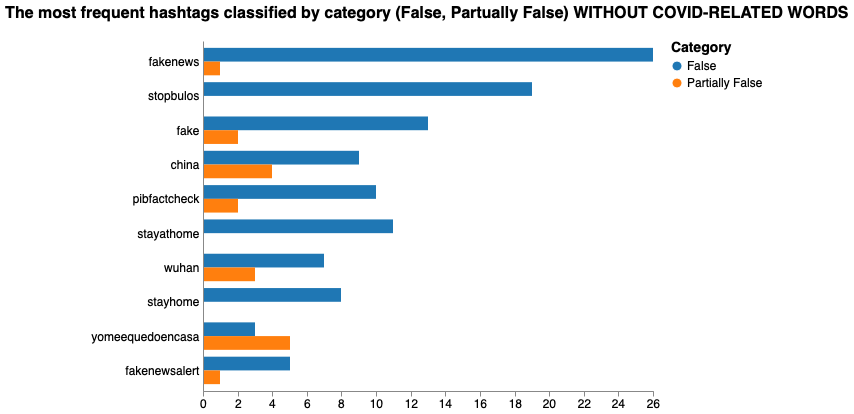

### [Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAATONABONHJnaT0AFXgACBGwiYdAM0VwAjgzjijMJBCxIyEHVAA29iDWM04snUwAnq5ImORsisEAFABiSG4QcFI6AApIipgM8W7BcQlwAJQ6AOoAkpoAEgDyAKqaOgDCVQBqpQAiALQASgCiADIAgpo9bSVVXW0AytIgAO40svRoACwCAAwy8DRkWGgAzOsyOEiysjTiZGgCMmqYbnBooGEAHphoINpwegZGphZWNh0dgcmCcLncnm8vn8QRCYTIEWieUSyTSGSybhyOmRhRK5WqdUaLXa3X6QxGYwm0xkxgkmEmNAAXg9UABGABsMjYxmMiTeqAATGsAL4yWShFCoADaoHESAQLJAoKY9xmxHiVggaBlIAq9kcznexiQAGtrHBZlqZDi0ALOSA0Wpsrl4ok0KyZFA2AwbLaAOyi0B6kFg96GNg4JgMNwGGY2tkAThkjpozuxrpZGxAXp9-NZCcDuv1oMN6GNZrjGfde2T6SdmJd+Vtnu9vrZAkLwYNWvQsHOKGtVdQSYdddTDfTTdQyxbuerneLofQOBoTGNUEwsDgUBNlanrKzKbT8YFs7brIFC5DpZAhiQgVCMDYCr3brZHtHGXHWPjWZz59ZK9u3eWYGDsSRBynP1ay-Y8hxrbNWzzEUpCDRcbzvQInxfSC3wADhg+sfyHP8kLQPCgJLHsQECZ84H+Pw2GsKB7AHEB4wQo8J3ja5ELnVAKNQotr2o8tzUteI4AyV8WV4rjiP3M9+XZSilxAZBxQoaB0hkq5CO-Rs31I-iOyErsqPeKN7gg9ihzksc4KnYy21MtCRLDNhMl01B7Ng7iSKUq5VJvKNFB9M5vN8ojDMzQKfOC6jZjsTAICQHAcG8mdP2iycjLi5YEveJBTBoFjMv0xy8r4tsCrM9DqMk6TcJZLL5JitBnP5Wq3OA9BLD8ejxBYt1mvdCr-KnBD-y6wr0HECNSvK7KDNy2Lqpmur3PQBAaDcOh0kCJa2tWjr8tmpUYDME4jociaqumlZzrSnAPAYMQxD28VlDYbzD1uhS3yyh7p3OiBjnObzOP+9q2TOzbepAHAYBoBxzkuUbUChvyAbW4G9nOqBFDYWYbPjD9jpPOL8fhiz0DEKBxzOO8hrRyHxpx071v2c7QTNMwwYkLwmF2uhDoxrGct-KnzqYK6TTR8QLStWzJvZmHOu5mm1Mw1LjAecW1ZO1ANcxgn0j4SI2eWyrcbI02tZvfacm809rbulkPzx87QPAnBFYYfRxFTK2KYCrn7Z62ns3SJB1TlBFhak+azh2rwJBD6GjZN6nI7U4X7jCTADzWNYcAUWMDbdjnjelh3qJNebZnoOB1xSjPsfV2vc5vKBmDYymq5hz27Zz4SEfuJgkHm0n4MNqXw9H8y1IAZ7IDxthgOUYAAS5oK7xBn1XB6zrux6j57Xvpth7g3GhSF+ufZ4XmW5dZjHXdDxTn7r949rgJgpIP2PhxU+S8bzxDIFJYOldP73RHudLI+sVZVVgSyKa8Cf7oAbsTWiDBFCt2VgPVBnNgaXkwbeTAZgLjNxsPAOUah07v0fk5OKZDu6iXsHAPaADFA8NBLIF2zC4H8TYWfNSitLQowZjQGglBBHALDqQ865xjBuABIyfuQ4P6Z3nko8hJoDFCiFPI4hNdw6iLAdRbcxN7AmJ0You2Fj6pGiQBuLcO5vLk3sV-PR7D3heiJnKYge83oKGOHKOxHcT7mPOmacQD5ImSwcSI86ZgcARDeBjLxUSyasIJsjRWI1kEsm0Tk5JbYnFbRAHAUgNghSsiAaY12vixE3lmDHCg5xDDBLCoQrRQjbYpPIUgRkdBLrPkCAzQ+KDvFvmaY486yBFCKESStXRCzyEwECLIImzxJkwBjETSw5wkFENmYMipqSuG+GMPNShcAIzWFWTbEhGy-G9gORENgxzFaeIGWNGJ+iGDtLoH8hRPi3mtOog4JA8BrCTx2DgImYRDDPPdq8oZ7yQAALcLQAOaLq4m0qQjYQNB5YXAtEgWYFoTlyKYeC4RlzyGyzeokBIBLO6AqxTgZge0tzxCWPS0xRLzrCCnqCXu+CLQcuiS0yx7wGKyGII085zYuVQveMgCAu4hWqrMXK5xvZlA7jgJk4parhV5PIZgNgkDm6KGpaaawfSv6mOHpijV6ABDo3NYKf5+rIXyvQMVDKuqyksPVUG9SfgfQ0HmE8sNSSI0GqqalIOoJLZZP9e6plWL0iQJsNYJAsbxR0t9aUpNjL+TEqjokRQwSoCnP6Qyi51bzreioUUs54aq22mUYoF1cz-UivIcceWzMZXrI9VGi+xau1DmyZWj2VqsVJR+omtZ5S23kMbveSdW6+3MpOJAgdKqe0lJXZ6uQe9txmu7UujFuar14ILXehd2bL1RvoFPE0g61pNM-YakA5wziaKnBWzdybA1AfgAKmAZ6H1+sjUB8Usw2BsDOLLWFNAED7qg9OoD7SHC4MUOBWQf6LV6pHVinWxU4AMB9feyDvbBTnXkFPAA+oAcjBAAiYIAUjBACiYFxwAjGBccAFRgYK3WAdTeFe89BvQ7Dbhul5AaCNVNg24egaHFB8wo0hy1yGqkgdTHKRQCAxbluHdJhGZdFAAC-DAAEPxCakoaxeaemIMqeo1ev0EjPNWcMwjBA0AjFrDwyxmtak7BnDYPEGgkmqNxUAsMzcYG3yLuY629050an7S4QEiQscQl6cy955LsSvlyipSVhDWWAXAxS1i2DGRZZwFNG-X1ZX0WqfPKK00dZ0vLpbY+vM50yAMDOMcWQ7TEvntGzl8hIGJAKGgV1wLjXcuvHOLfCQZgcV7UYetkbvWxvkLOGcKSigkDejfa6pL4cmtXuEAHZAMAEB92uzq31f15uw0e-2lGTaI1SYB+QiADBSoLH-s+HhenfuIZzWd1d9ETSuLoEyawZbcknZNk9qN7B+Y2uGkNgFBnNvkMJn6ObiG8cEzYME2Q+Ywk0-q6dxbWL+Zlw3Kz8rYOsUsVM4EFGHhxDkd5z1unwycOlY23bfHQGvSM-qQmYzpP-vk-l+2lzCBnhK4WPmCXhKKvkLEhx-zRvOUU4F-KKS6HpnDc1-xBXVSmDoeZGXU49xT0YwR2zpHHOr0qhA4UiAHHw+W9lVr8hCoffHad318H6RZe45N1i1RDBI9TsTzRzITA6sqYD2yc64gmAQ5wOKFFBeetF5dwjBgFe0MKnEBAQO9AwtZ4PcX8he1LARCRWwZGwsGEO85qD63V6dmBGFnYFZvuP386vcjBAHR4CKA6KCrNqfF9RvYwIrfCfkdXt5mjCQhWIkH4exPr98B0l8uBzMv7tenpeAVFPTv+Gc9XtSiLC44YzDV7VzP7DLpSXwGBTz7SZo-YL7X5AZ1oNoKBwDPB0AVzQEnbAHNZ24KBeBDRpTq5+6F5p5XqmBTyNqAFDxEFRpvT4EwHR5Yoxhi5Hbzzj50Hf5sAMzxBc6CxID5yizkFGwYFXrUr8wox3aP6I6UFAY+BmA+CKaALz7oGSFVKmZyhQBMCj4a5X6sEE6zCzCyAd6X5-ZS5YqlSBA7Qf4sZ15RyYDPD3CQIWHZbd6573i6wtxEwIBhT6B4Ip6H6B5RpqFDR0jXbsFVaxwAC3vSDhC2ThV6gAQnCAAgcIAORwgALHCAAocIAD8MhuhhtOSh487BJosgxMQcYua2zBeqghUaMYO4hRJMAoDSChLBzuPMPoMYs+9g6SQsqoDR5RuRUcZo+gMK5+6u3WxuO+QGHmbm4oH2PhWhTR4ObAgQb0WQ30-BOOsBVSsA6QosHGUR7OMR-hoRPSb0XSwxcucxWKQcjaaw7Iqx76YxRmJRxUG8KUQxRxMxRhvRakKK2ACgPxqK2RbOxhV6SK94tIighMcWTouxQJUa7WGQMAlgTq0JnxPcRMoQpRdxvh+xiuDOCwHG+YauyJ9xCMjECA28zwRJ6xJJYMSAAAj6cdvlSVHCxB4E+MslQJSdoUBtdmKoYOBBxpsV9hxnYAlgCXzkyWpPrkzgmCQUNA-o7rMV-gcYzvmLAJyecVeiaKETVr0ogLcRChqTflwqEL8eqUqUBhQAHAwG5maUfgcYEsVr0sQGHkwHYCaEpvHoqXaUBm1h1hcJPPvp6R8cSVHMaE2GKZLiidRL3JPNgRqIGTjliVYdrKEHguKBZmUU-lGe8OcGEFKoEraX4YrrIFAIWdiVUulPKWTl6UWVUsgB4MoDQYoSGWpO4RAU2Y0eaRWSIfIL6BGaMRKRhNfJdnPkGTkS2SFOwI6ukhoQQTXtmegOKLtIEH-GWcmSFB4DuMjP-mYXSPBv2VblyVUkThEKavAMQJ5FWZocGYOdRIAFwggAfCCAACIA+YALwggADCCABMIIABwgT5gAwiCACCIGuedIAM0MgAtwyABTDIAGUMgAJQyADXDIAJ0MwF5CgAKvOAA6HYABkNgAKD2AAu44ADftgAJUPIVYqACroIAJuggAF6AkWACHoMRVeoAAWKgAA06ACjroAEvWdF-h0A24HFcBdEYJoImm8Q948goGI+PFVS1gjODy4lCM80pAbgrxtWB5UehpOJDpbxCgMlUcDelemlyl2e3pGxVWcWbxWlKZu0EQZlbSYEU8t2vp32iZNZ5ZCMUAsgE294U8DJSZ50fs9GgcGJ92N5R5CMjANgnWjlQVqlVSDZIyy8NgxA2OmJTl651EMVjIZ+bAiVgV45t5YYDe6SX4FwVl1EtE1ywg188QWVGWZxXZLlEQhR6oxVYYoIYu8w9ATsGZSVkVtVUcMYCAk8igsgnV2VgJC5FCV0O0RV+lXeKV-ihxBuCYTVvYGGKpCYYSnlS1iEgSRWpl01n+hldV6lJWlC1p+5aBnZB1UcgAInCJGADEcIAIxwgAVHAJGxG3WACYcIAExwj1H1gARHCAB4cPdW9YABhwgAHHCAAycIAMJwgA1HCACEcIABJwKu+p1VE51EsgDAJoPoZAseWqm1J1CAkYeC44K4HpmZEhKN7wGm9AYJ2Qm1gRxABhY5o15N6AZAZgoI9APoPCjGXVOVwVUcws18tqpU8Q7SMh5sSNw2uV6As+6og1EtDWfNkpsa8Q8t-2UtIApAkQs+CZPNTN6tXN8o66jN4pitPc81vSTsqYVVCp3Vl1akd+aiYl3RWZzNiMPoYq+eztZN6tZwUlQQzIRMm1dh1g4ue1lhPlyKppYdjhs10tuYaMNqpe7Wap0d0Rsd0cMh0YhJqdex6dCoZwLJtNTgPKo5EVvNUVCMiJ12YVisBVVR8QgQ7x5dPV2ssmu5igxR3NI1JtFdUcSK0Om1OGBVLVYhNtzddtZt9aC1m1yMimT4DGWA8OtBvd0W7WmmyMelxtkZrtXohaNgEAWRW9A5pt0Z5tb01t1ZtttZ9eFeJpg94gtIilkROdMJcBUkwsXlyV9OR1upNJpdutPdLdGE7Na+Ql9C6glVuNdIGGXCVkRtZdetJ97wyyEATdiDK9N4xwygaDgDE9DUG4cAfo4WL9Y1tABcEAYqPom9CDuD191hByqtFRQGA+jaqDm19GRMZcm1T9b0ZcYuiAAVyN3llOZ9NJcoyAF91549dDkpuJ+hawBJAlgjY96DQDp9q1uu3Dcj+YqgWjP9b0mxmI1gkCkjIxh5GDDU2qiB+NZgEgopR95jajIE2DZo8gRjOG+0I+OD296thMDAjIRMYqpjNVeDHkCoMZHJJDrtdJEgVgF5aipmwTjJSD6ApK3D4EFAYuB2m1mEj4dEqU8ld81DYcF1MjN4mAFwZAo9l90jzlfR+oO0-93dPjKTIAVRm1vSXgn9V9dT2s24hNmAgQYJrDOT+VGS7DFwJy8hDjKlTjy1q18gkjc5QBY1MaLEI+PgcoLMUkkTMzBlZT0Zos-4DM7KUTPtUi68seSTwjWK6o1kHB3DUAoaezM150lgm1YJNSUk+yu0OtzTx9FjmqQljdyjNTqjoT6AwsZA9l4VADLTgL6ATe1g3IMKcKpeTgZ1ND8Lczt4dgaLCKmLcLALOLwzLcpqkDZzrTPsU8esFwW4U1Lz+1BzIENlQ0BS3TtT6d1LgRR1b0m1oQYQYVTBRLjjELwGxAzmCI4gjIjmjIejO1JWBCm1Q1DlIrszYrEOYuLh6Sdwzx3Dri9gbAWGhRTTQjX95C1KsghS6Z8wEAhRuGlLCLiM+gZ57AK4HZPRrt2kDrjL4do61pEMjrOLPK4gYqBiuJvSDeYQjDY18wesQdCxAqw1ZrPT6dUp2dvrMdW2gracGhZj6rzL0tU8M2+osL-zorhbIAZg8gXgZAQcKtQbYrHgk84gaOagIbOz8rQSJW3o9lOT8A8gDMNbm1d+6QF5GQSBm1GkygfzKbnLoMNqkYMYEAE2TAPC4j1gAlxT5bBbvT4CqD8om1aOoy1dFAOT7B44iQkqfBjblbXAxjCambadoMT4swQdSAroaMMAmxpwdgU7sKMcII12I7CALE-M-L8oe8Jo4EHT8oaUT4qUM9EgaN123jxLYrOKnk9gu9bmIR+jEA1z5rFxxMUbCx3oMbrtYQvcCwdEvcfgFH+t18d8oLZipTe71EaSGSDyPgHBbgDHrTa+KcH26aybKjtD7HyD1yLcHTUA4g12sWzErEOH2w18m1AdPw2wyAOTi7hgmnHL4LlbLVGi9bOlJpaHFbEnqTOACA7pm1wS6o61tJhHqbPlrirjtNDAtJcAXnjI8gk8bgbu+n4n6dxwqUyAAxtNg+94L0U8ntT7ud+S2DmAONt7ln2KLcG1qX6dtIzwFuWX506oUAUy274h-uY1rhxaNq+gNqprYn2LYrEi80ZmDb8Xr96msgA+5nu7ab2jCYdbR7q4Ok+X5CDqxbQX9Xd7oIWE+Tsc1ypAXX+zaX4EoIu1rXY1hRFwyg-HTrWqpKs7-6nr6tYjKMhLO7i36dU2+CTq-mjU1TUjBnaXaOXdc7D36dWGYuG7C3rzMeTg436HlbRrcHFA0bw3WKeNeAwga93oYgtIk8WnoPV6xUD4LJClm7ABCP9pCrvSc6bme0f3FnedfgUOvyGPcBlrj7WL-3aXwS18zEqY1KhgUkX3TLaXVd4qO2yHUk24CHyrVKebITlbbPNd9ErwIdfgzn87Me2w1ddwPBHaTPHzvg4JV5+b5342DOSczemAAA3JtQiJrSzJNS15TwT6DCxAgPIDtKWaT8eWj1J8YLTRaGCfWTe2t67WjZPPYyb918ooEQqLrzbwjAsAzaTWV9ExcPcIkKJ2Pod60yqOhv1VJM9wdy7b43IyVOmdtzi-NJPJDwMR4O5YNSx8sxQa7VqlqdGCrwL2lyu6Rhm6H4Qe76mGZvA2q2r+QsaW4EjPjz7z9+IOkk+Pz8k066ohEAsMWorPjTGGYZu3Z5JPoB84cuP7B4wG4Gjfja3gB6h1gMB17WH-rQwC9v1Xgj3+31igxmN1n2K2RucGRm1YwJk+KFf5Wy5gOlX8Pzi-MG4AqMz3681gYMTWN5t9vu9BfIjUXEB7BNqA1eUNGA8CbUxUCAD7MWzRwOBGmHTVlCZlxrGkLgnlWQovSGK00YAJoc3ErA+ZIBdofgO8CDzd4+0PKuZJOOiSKxr96IHgawHrGWTR97uwXb2GMhwg0CqWe8PVoHyjghYXov-LNuDim4qIIg+dZ-ml1JSIDAg8sRAVwj2ikBTAz4bcvPXnRncQBV6MwCjy0arUOMmjYQV8QYDPBwkEvV7lcmHrWJVqm1b1Dw3EHPtyEYqHcPD34FOt4sk8SeLTSYDW8vBOLKUgSTMCi59uYLbgUtijAD5aWevLIGEHrIetU+rTewCaDXRyD06aOPsBNif5mCbw12ZACaGwabxT+eg3fFSnQwRCuBE3R7jHD7DKsVAfVW3OCXHBVMlmy9HFm42RhdtyBD9dgmQA6HNl1ajcf9tqhcEJdyEE2K7K4iCJIACsvXawVEIFxyMIgmTUqBMLa4IwkoSAP0JAPyHUQ2A6VRWE+C6JBCGunkDYRAHEBLDah6dI4Stk2raY1+lNGAJnwOEgQIga-PLucMrYHR-MaguAG8PSZTxFYfHD4XNFIEQi2mRTEdqaHYZo11maMBAO0i2YNDoR+VX7l0kwBiQfh3vM-leiGglllWEgTyGGXBG-C0uDMHhJJA3BlCWe6dbwIgHmFE47MtwqnunQQ6AC9oesTwfiPKFk97A36V0jHDu6q8BRVSTZsQIoD9Vzc4EL3sAIZHjZzgzzfkUqPOzWJrsTtSkYyOWRwAB8iI1cPcFkJ4I4A9Rc6rHydZbIdkbAPZO4C+Q-IryJfAQrG3axxJMhPMeAB4H+I6irkbuTyM8FZAcYQ+iov-lei9C2ZLi1BZLgALXzv8bmhIjtCd2Lav9Mg6PX0R3wSDv5oR0giktCIgDKBRcaOOUHvD2iFItGfVN3JtQeGeRlU0I4tkTAWBqcE+m1EjHgH2SC1aAPotUWGMx7dtekspMgnv0b7q1Y0YQcjOzQUCeVCiU7JAqVFb66D1RWKHaHYSnYqc6xGYkwiFgobxZoAC4l7ssKvRklkCXoD6OPxWLQjAgcJB5vmKm5hBnUHlfVtdmGgeid09GE0AADfMQs5ToWK02IlEKApGXoW8TsqvxHiHzKoeEjyGbjCRFoZwa+IuIWhfKAcOxskO9qtN-MYZTYWNUlR6xQIt9KvMOPnKu1rOVrKERaJSE7cTi7I03iIwdLpIvQOQPAPGKI7hi5G3xMtgeLuH05VqjE2HMX1-F3tTUAcHZm7iGqF9qh4opccQSdRSV9xdXDkYsmLazZoRyAFGB+2QCs1VwnAqSb2KAyslTy-7FvDF3OBoxzgAgbTKHRglfpPC6UfmHuIfq00TkAoeaMK0XF6T1MsAQ5N8khwk8KJ6EkflJDUB7QNE2onsRIOXFSQzQFI8Ka4KxQAIQkYo6vunSa7tJAg30EmqGIilsSO6aE-fq0wQACACOuNZQFr0Ho+AUomrd4dZKAwIBcAUAyZLAPpEeTthWxGkt+iH4JiCcKUc4B2jIzYSSJLAziQpNolg8woJqWrpEO4kjc4siwaugLCag1SNipqH1rFMmE25lkSvYqdCLczGSuOdrZkeCVIK+ABp6tE6juFOmtM-4l0p1u6zn5FcTkEAbTKq3cnZSo0ssNGBxnSQ8oPAI+HDkTAC67QYpWUuKVenMC2VOprEqNKSIPi9s-412ULptT9B4Q1gh7aETsMwAAByGFJWU7rcMD4NqEmHYExAjsqGWjQwF6Fxo4Z5JU0xSZIPaxDVqxfDZuAMX6g3ScWYQG+M+A+xqAGWa0rYbWnmBi4zh-MsaiQUmxPjQQ1w7YFAinjsyxWSKL5jYBCGLUdpeCM0DpOSkywaAs+V4fIF0bQjhowUjwB4GQBstmpb0oDJJU4HOi1irTakVJBVn-s3AotFiS5yWwChlgeIkppaJJZ7w7w3uTALMDzFLSEYAtIdiVxGm994pTED5gHG2B310ZyMMINoP1H2SPpLcYabTNGnhj2WqtE2ChCxT9R5AinHQaV3E6FyhCrLfOXFErn+FPkRyXyU6Or51zmGq4VuO4henlzahrc13GBOT4x8emvclykTBJg1zw4w80MkiSIlU9J5akXEUrFu7jzgYc88prajPJSRHUcSJeh-35CrzqIHVZeXbH3nvBaICoRVExFwKIcZ5FnE+WWFcSbh4AHiG+buzvkgBZ0oSI+fxDfkvpZ+L8xbm-JpKBt-JD3N+Zx0WkN8e5bGdrOIG4z8YhMomCTP-K7xvyF5loL+W2DfkY0QUd3W2SgtBgQEM0NsluQTD7gYK95woAALo3B5pzvbUE8ECBcMyww5GYD4C4Ti5pQ5qf5JQsLCDMmFIAHwJpmmZIEkU7wSvAHEoDTQdAAAPgAC8OgdkDoAABkSinQOIoQCSKkIOgAADzyKBQ1OKhVQpkDaRI+9CkABu1PkmKkEfCxUC20DL2s+hjwOQBKHeDKgzhbCtfu8HlSigq2U8ewtLTgBCDEYJwM4EVWNiUBREFi9AM8CsUzAbFv8E5ENzkDPhHFqAUAJXklBKgeC7i3wJ4vQB3MrAIAHxae0VDzBFgZ1ImOFDQAnUkgIAdTtUrCi1LLiLIGpYWCiWIRDkcSxhYqHqr9gKRDiiGGkucWghXF2SpBB4oERYI4Ah0YpX4pZCgB72L4XsCaQRCRADwRSoxe-OeCaVpQoAMfrP3QDGizUsS9AI3RZLWLSoJoBkMyE5jNsuEaQU4KzGnAyBRk-DCkv9juVuAYgdIa5R7FET7K2w2KTyFVxmAnKQAMS85TME+XfKbAvy90JeGoVtNyAIdHsDqHiV0wzCbuCkbcFVDoAGgKyxEKwqBlzVOlYoG9Ltg0Aa0gpwtCkaPIeWhLLgPkFsGogQDiB6VTygiNmD2g4AKggSxTJzBxVwAqgygA5UqAjCgrMV18SYJQjYBmgGggtFZOgAADEPIB3sYslVuBpVRMM0MUAWBLAPlPBLhDCvpCY54VNwOgPcGNVwq2QBURFUsl-RmL0VIAVmt6GeYaDcMQy9cKaicUZLRlKoJBO0q9VmoXVDeIIF4ucTCgfFzEGBk4s3aAIhlh0IZWCrOWSQiV7C8Ne5EjU+La2codlLsvMW24KafK3YDIFM7RtIWykvVTACiCYyU19wTGQUCKWIqrFqK2UIWuXCoEnVdimYCUqLVBKBlGgdJS4vvmNozUEy94BrI2V2r0gDq-Ne0oGrKx3VPq4dQItcTeqfFTqgwWamjXyBY1haRVaAETULLIVHaxdbksmUgBJ1PirYPyqTUnrEYqBbtd3nBVOKwVEK1NTSHPXvAClDwHxc8AFCvr7176s4T+o6g+LBFfHO9amuWqkqBFX6qZTMpuDoZNMKgV9dsFzXvBgAgq1AGotTIaLLEyQTGZoG6WYycN6iygBrMI3yrcwpG8jT+uFAbLI1PCnhUAA/view)